In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the dataset
heart_data = pd.read_csv("heart.csv",header=None)
heart_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 
                      'target']

In [3]:
#Check the head
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Description of the abbrevated variables
          sex:- male=1,female=0
          cp:-chest pain type  
              1 = typical angina
              2 = atypical angina
              3 = non — anginal pain
              4 = asymptotic
    trestbps:- resting blood pressure
        chol:- serum cholestoral in mg/dl
         fbs:- fasting blood sugar > 120 mg/dl is 1
     restecg:- resting electrocardiographic results  
              0 = normal
              1 = having ST-T wave abnormality
              2 = left ventricular hyperthrophy
     thalach:- maximum heart rate achieved
       exang:- exercise induced angina
     oldpeak:- oldpeak = ST depression induced by exercise relative to rest
       slope:- the slope of the peak exercise ST segment
              1 = upsloping
              2 = flat
              3 = downsloping
          ca:- number of major vessels (0-3) colored by flourosopy
        thal:- thal: 
              3 = normal
              6 = fixed defect
              7 = reversable defect

In [4]:
#Check the structure of dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [5]:
#Check the summary of dataset
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#Check for any missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Initial obervation shows that variables ca and thal has only 4 and 2 missing values respectively

#### Data Cleaning

In [3]:
#Check the unique values in target
heart_data['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [4]:
#Replace 2,3,4 with 1
heart_data['target'] = heart_data['target'].replace({2:1,3:1,4:1})

In [5]:
#Fill the missing values with mean
heart_data['ca'] = heart_data['ca'].fillna(heart_data['ca'].mean())
heart_data['thal'] = heart_data['thal'].fillna(heart_data['thal'].mean())
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

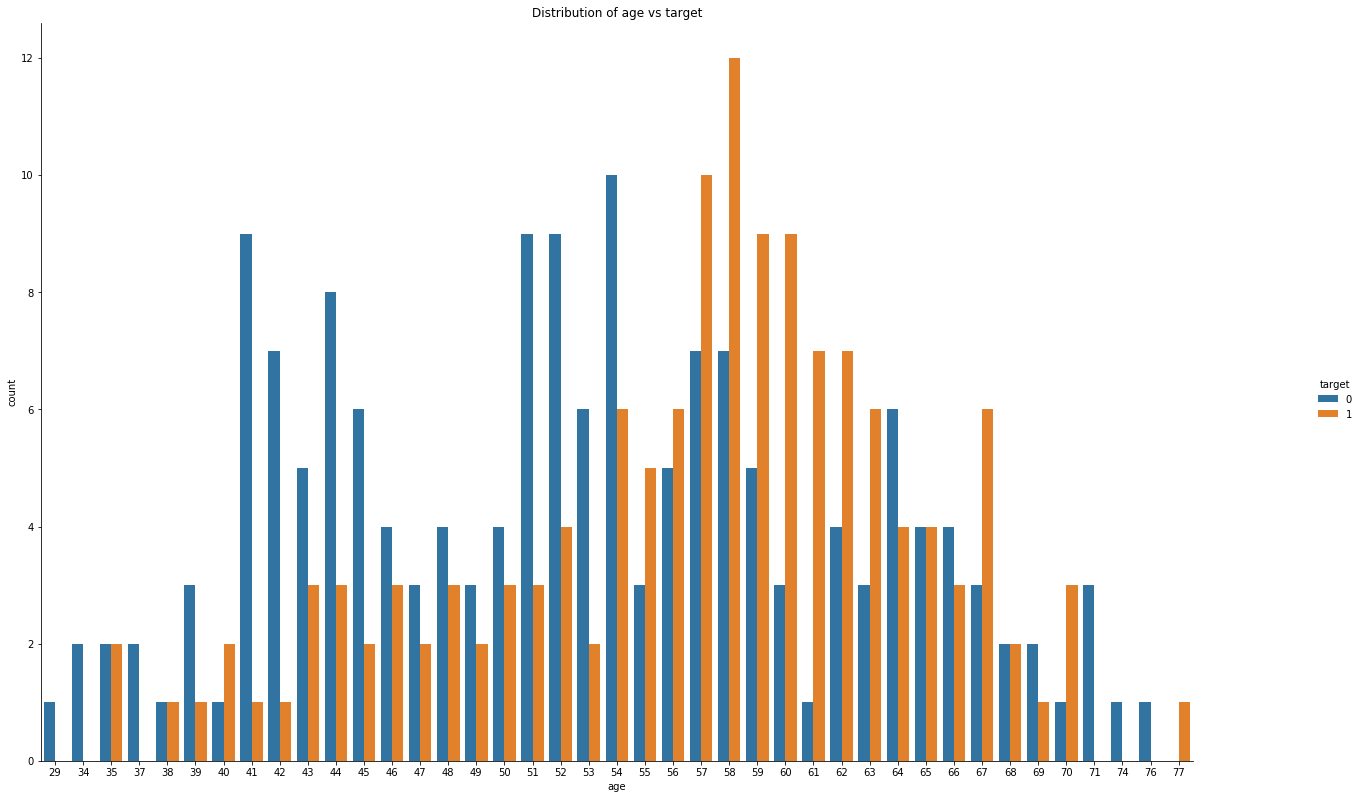

In [13]:
#Distribution of age vs target 
#plt.figure(figsize=(20,12))
sns.catplot(data=heart_data, x='age', hue='target', kind='count', order=heart_data['age'].sort_values().unique())
plt.title('Distribution of age vs target')
plt.gcf().set_size_inches(20, 12)
plt.show()

Observation:- Risk of getting a heart diseases increases with age

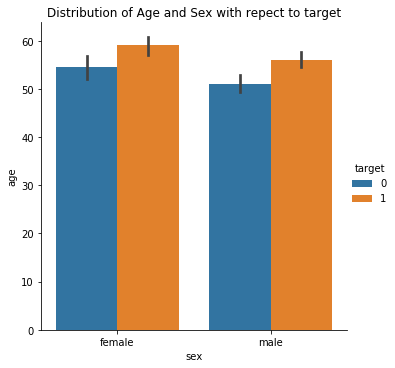

In [18]:
#Distribution of age and sex with respect to target
sns.catplot(data=heart_data, x='sex', y='age', hue='target', kind='bar')
plt.title('Distribution of Age and Sex with repect to target')
x_values = ["female", "male"]
x_axis = np.arange(0, 2, 1)
plt.xticks(x_axis,x_values)
plt.show()

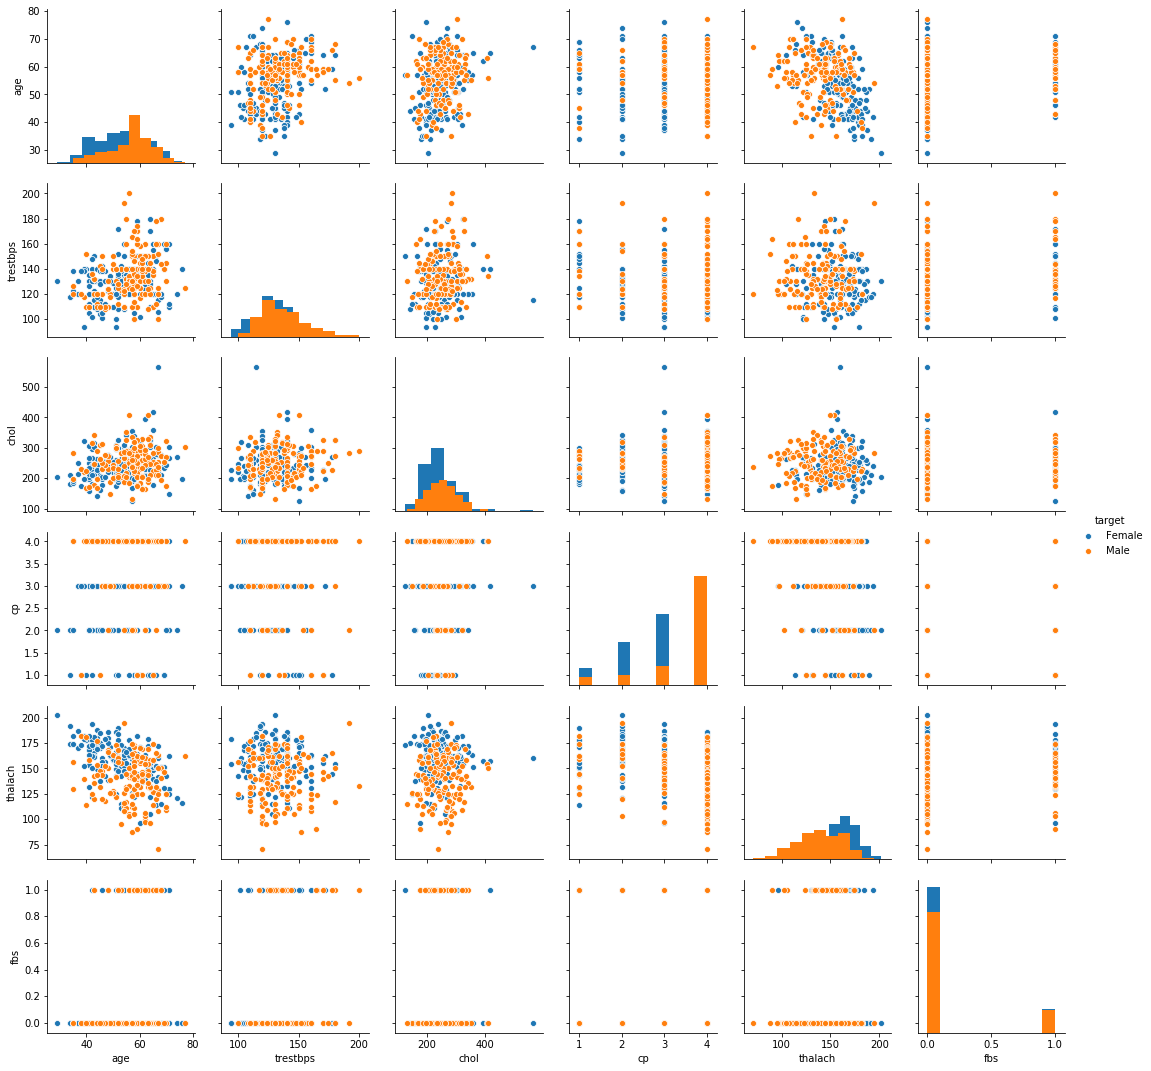

In [59]:
df = heart_data.copy()
df['target'] = np.where(df['target']==1,"Male","Female")
var = ['age', 'trestbps', 'chol', 'cp','thalach', 'fbs', 'target' ]
sns.pairplot(df[var], kind='scatter', diag_kind='hist',hue='target')
plt.show()

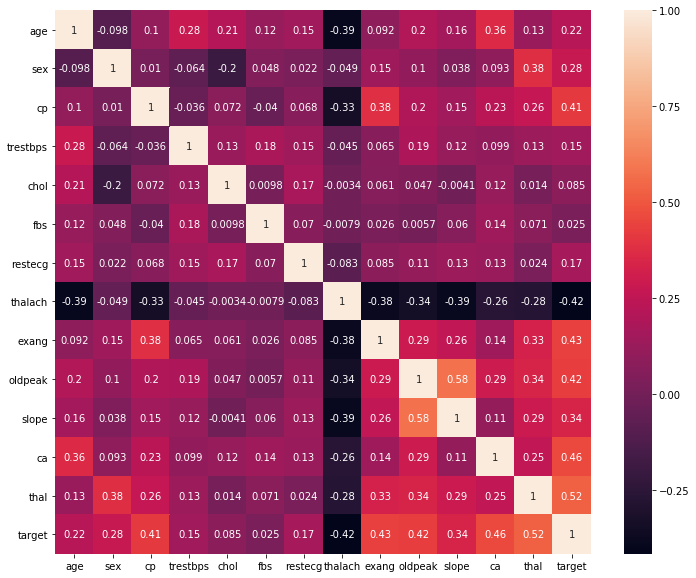

In [66]:
plt.figure(figsize=(12,10))
corr = heart_data.corr()
sns.heatmap(corr,annot=True)

### Train Test split

In [6]:
from sklearn.model_selection import train_test_split

X = heart_data.drop('target',axis=1)
y = heart_data['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [8]:
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Featue scaling

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Training

In [77]:
#import the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score

In [117]:
#SVM
svm_model = SVC(kernel='rbf',random_state=99)
svm_model.fit(x_train,y_train)

svm_predict = svm_model.predict(x_test)

print(classification_report(y_test,svm_predict))
print('\n')
print(accuracy_score(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



0.8524590163934426


In [119]:
import pickle
file = open('heart_svm.pkl','wb')
pickle.dump(svm_model,file)